**Review**

Hello Byron!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions. 
    Thank you so much for feedback and encouraging words. It is certainly challenging to do. I copied the LaTeX from discord ai bot. It is still not in right format. Thanks! 
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


#### Note To Reviewer:
My apologies, I had downloaded my previously submitted corrections for the project, but I had a hard time getting
the cells to run.  I just decided to revise the previous notebook that I sent you.  I included your red error comments
in markdown cells under the tasks that needed corrections.  Sorry for the inconvenience.

<div class="alert alert-info">
<b>Reviewer's comment V3</b>

Okay, thank you for including me comments!

</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:

pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import the necessary libraries.
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

import math 

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from scipy.spatial import distance 

from sklearn.model_selection import GridSearchCV 

import matplotlib.pyplot as plt

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
#Use pd.read_csv() in a try and except clause in order to upload the dataset in a local and nonlocal computer.
try:
    df = pd.read_csv('/datasets/insurance_us.csv')
except:
    df = pd.read_csv('insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [4]:
#Use df.rename() in order to rename the columns appropriately.
df = df.rename(columns={'Gender': 'gender', 
                        'Age': 'age', 
                        'Salary': 'income', 
                        'Family members': 'family_members', 
                        'Insurance benefits': 'insurance_benefits'})

In [5]:
#Use the sample() method in order to get 10 random sample rows from the dataframe.
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4444,0,21,19900,2,0
1328,0,47,30900,0,1
4645,1,33,35400,1,0
703,1,30,41700,2,0
1929,1,49,47700,1,2
1125,0,28,29800,1,0
2787,0,19,33100,2,0
3086,0,30,23700,3,0
3980,0,26,55600,0,0
4916,1,24,46400,1,0


Code Result:
It appears that the rows of the dataframe contain the correctly listed information in their entries.

In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:

#Use the info() method in order to check the data types of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   income              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [7]:
# check to see that the conversion was successful

Code Result:
It appears that the columns of the dataframe have the appropriate data types listed.  There is no
need for any conversions.

In [8]:
#Use the isna() and sum() methods in order to check for missing values in the columns of the dataframe.
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

Code Result:
There are no missing values noted in the columns of the dataframe.

In [9]:
#Use the duplicated() and sum() methods in order to check for duplicate
#values in the dataframe.
df.duplicated().sum()

153

Code Result:
There are 153 duplicate values noted in the dataframe.

In [10]:
#Use the drop_duplicates() method in order to drop duplicate values from the dataset.
#Set the inplace and ignore_index parameters to True.
df.drop_duplicates(inplace=True, ignore_index=True)

#Use the duplicated() and sum() methods once again to double check
#for duplicate values in the dataframe.
df.duplicated().sum()

0

Code Result:
There are no longer any duplicate values noted in the dataframe.

#### Descriptive Statistics

In [11]:
#Create a filtered dataframe that removes any zero values from the insurance_benefits column.
df_filtered = df[df['insurance_benefits'] > 0]

C:\Users\HP\AppData\Local\Temp\ipykernel_11776\2026843894.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['insurance_benefits'], shade=True)


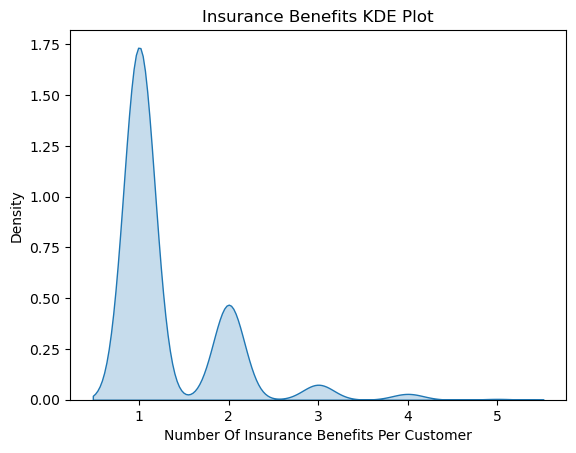

In [12]:
#Use sns.kdeplot() in order to create a KDE Plot that displays  a distribution of the number 
# of insurance benefits per customer.
sns.kdeplot(df_filtered['insurance_benefits'], shade=True)

#Use plt.title() in order to create a title for the KDE Plot.
plt.title('Insurance Benefits KDE Plot')

#Use plt.xlabel() in order to rename the x axis of the KDE Plot appropriately.
plt.xlabel('Number Of Insurance Benefits Per Customer')

#Use plt.show() in order to display the plot.
plt.show()

Code Result:
According to the KDE plot, the entry with the greatest kernel density in the insurance benefits column
of the dataframe are customers that have 1 insurance benefit per plan, with a kernel density of: approxiately
1.74.  The entry with the lowest kernel density in the insurance benefits of column of the dataframe are customers
that have 5 insurance benefits per plan, with a kernel density of: approximately 0.01.

C:\Users\HP\AppData\Local\Temp\ipykernel_11776\134223271.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_df['insurance_benefits'], label='Male Customers', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11776\134223271.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_df['insurance_benefits'], label='Female Customers', shade=True, color='red')


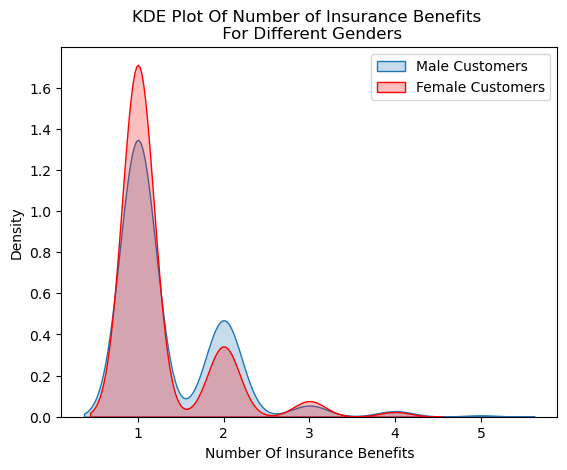

In [13]:
#Create two filtered dataframes, one dataframe that displays only rows for male customers 
#and one dataframe that displays only rows for female customers.
male_df = df_filtered[df_filtered['gender'] == 1]
female_df = df_filtered[df_filtered['gender'] == 0]

#Use sns.kdeplot() in order to create KDE plots that show the distribution of insurance benefits
#for male and female customers.
sns.kdeplot(male_df['insurance_benefits'], label='Male Customers', shade=True)
sns.kdeplot(female_df['insurance_benefits'], label='Female Customers', shade=True, color='red') 

#Use plt.legend() in order to display the legend in the upper right corner of the plot.
plt.legend(loc='upper right')

#Use plt.xlabel() in order to rename the x axis of the KDE plot appropriately.
plt.xlabel('Number Of Insurance Benefits')

#Use plt.title() in order to give the KDE plot a title.
plt.title('KDE Plot Of Number of Insurance Benefits \n For Different Genders')

#Use plt.show() in order to display the plot.
plt.show()

Code Result:
According to the KDE plot, it appears that the company has more female customers who purchase insurance benefits than male customers.

The entry with the greatest kernel density for insurance benefits amount for female customers is 1 insurance benefit per customer with a kernel density of: approximately 1.8.  The entry with the lowest kernel density for insurance benefits for female customers is
4 insurance benefits per customer, with a kernel density of: approximately 0.05.  

The entry with the greatest kernel density for insurance benefits amount for male customers is 1 insurance benefit per customer with a kernel density of: approximately 1.35.  The entry with the lowest kernel density for insurance benefits for male customers is
4 insurance benefits per customer, with a kernel density of: approximately 0.01.  

C:\Users\HP\AppData\Local\Temp\ipykernel_11776\1655132643.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fm_kde = sns.kdeplot(df_filtered['family_members'],shade=True)


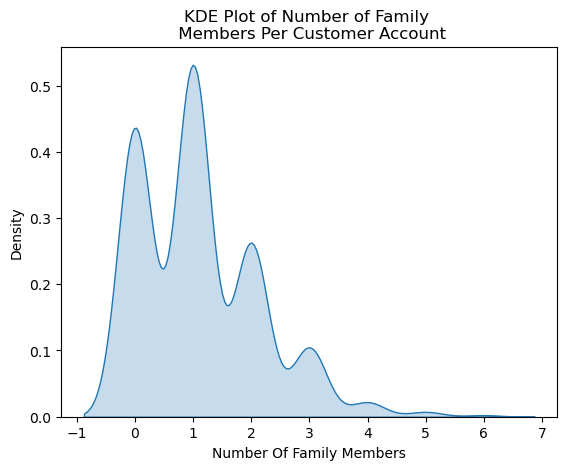

In [14]:
#Use sns.kdeplot() in order to create a KDE plot for the distribution of family members
#noted in each customer plan.
fm_kde = sns.kdeplot(df_filtered['family_members'],shade=True)

#Use plt.xlabel() in order to relabel the x axis of the plot appropriately.
plt.xlabel('Number Of Family Members') 

#Use plt.title() in order to give the KDE plot a title.
plt.title('KDE Plot of Number of Family \n Members Per Customer Account')

#Use plt.show() in order to display the plot.
plt.show()

Code Result:
According to the KDE plot, the entry for the number of family members per customer with the greatest kernel denisty is
1 family member per customer, with a kernel density of: approximately 0.55.  The entry for the number of family members per customer with the lowest kernel denisty is 6 family members per customer, with a kernel density of: approximately 0.01.

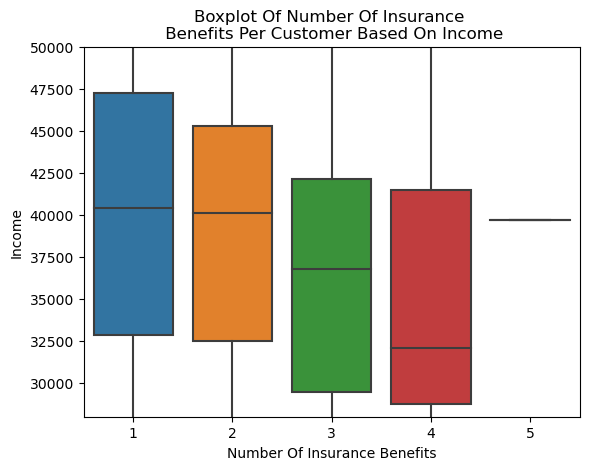

In [15]:
#Use sns.boxplot() in order to create a boxplot that displays the Number of
#Insurance Benefits Per Customer Based on Income.
income_boxplot = sns.boxplot(df_filtered, x=df_filtered['insurance_benefits'], y=df_filtered['income'])

#Use plt.xlabel() in order to relabel the x axis of the plot appropriately.
plt.xlabel('Number Of Insurance Benefits')

#Use plt.ylabel() in order to relabel the y axis of the plot appropriately.
plt.ylabel('Income')

#Use plt.title() in order to give the KDE plot a title.
plt.title('Boxplot Of Number Of Insurance \n Benefits Per Customer Based On Income')

#Use plt.ylim() in order to limit the y axis appropriately.
plt.ylim(28000, 50000)

#Use plt.show() in order to display the plot.
plt.show()

Code Result:
According to the boxplot, the entry of the number of insurance benefits per customer based on age with the highest median
income is 1 insurance benefit per customer with a median income of: approximately $40,500 per year. The entry of the number of insurance benefits per customer based on age with the lowest median income is 4 insurance benefits per customer with a median income of: approximately $32,000 per year.

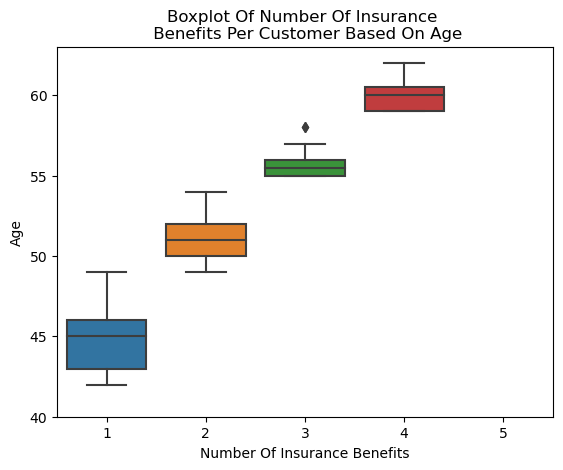

In [16]:
#Use sns.boxplot() in order to create a boxplot that displays the Number of
#Insurance Benefits Per Customer Based on Age.
age_boxplot = sns.boxplot(x=df_filtered['insurance_benefits'], y=df_filtered['age']) 

#Use plt.xlabel() in order to relabel the x axis of the plot appropriately.
plt.xlabel('Number Of Insurance Benefits')

#Use plt.ylabel() in order to relabel the y axis of the plot appropriately.
plt.ylabel('Age')

#Use plt.title() in order to give the KDE plot a title.
plt.title('Boxplot Of Number Of Insurance \n Benefits Per Customer Based On Age')

#Use plt.ylim() in order to limit the y axis appropriately.
plt.ylim(40, 63)

#Use plt.show() in order to display the plot.
plt.show()

Code Result:
According to the boxplot, the entry of the number of insurance benefits per customer based on age with the oldest median
age is 4 insurance benefits per customer with a median age of: approximately 58 years old. The entry of the number of insurance benefits per customer based on age with the youngest median age is 1 insurance benefit per customer with a median age of: approximately 45 years old.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


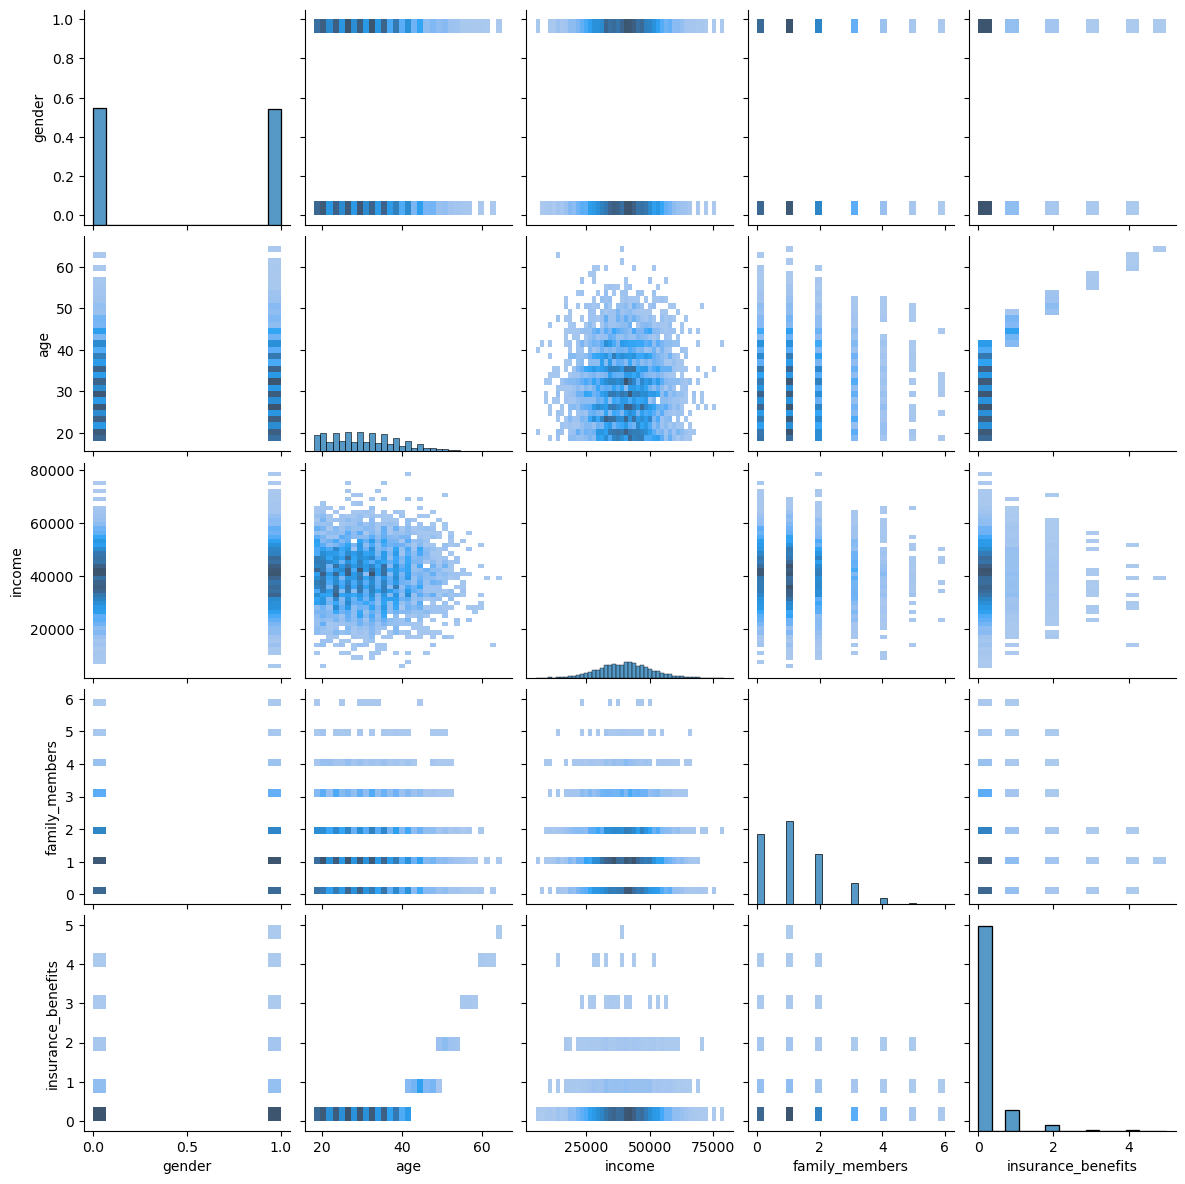

In [17]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

In [18]:
seed = 12345
state = np.random.RandomState(seed)

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [19]:
#Create an index that consists of desired feature columns from the dataframe.
feature_names = ['gender', 'age', 'income', 'family_members']

In [20]:
#Create the get_knn() function in order to return the row of a customer most similar to another given customer.
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    #Create a NearestNeighbors() model.
    nbrs = NearestNeighbors(n_neighbors=k, algorithm="auto", metric=metric)
    
    #Create a features set from the dataframe using the feature_names index.
    X = df[feature_names]
    
    #Fit the NearestNeighbors() model with the features dataset.
    nbrs.fit(X) 
    
    #Use the kneighbors() function in order to return distances and indices of rows most similar to n.
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    
    #Generate a concatenated dataframe that contains the column of distances generated by the NearestNeighbors() model 
    #and uses nbrs_indices[0] as the index.
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [21]:
#Create an index of desired features columns from the dataframe.
feature_names = ['gender', 'age', 'income', 'family_members']

#Use the MaxAbsScaler() in order to create a scaled dataset using the desired features columns.
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

#Create a copy of the dataframe.
df_scaled = df.copy()
#Add the scaled features to the copy of the dataframe.
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [22]:
#Use the sample() method in order to generate 5 random sample rows from the df_scaled dataframe.
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2179,0,0.553846,0.673418,0.000000,0
3742,0,0.507692,0.348101,0.500000,0
248,0,0.476923,0.625316,0.166667,0
3831,1,0.307692,0.579747,0.000000,0
2773,0,0.415385,0.588608,0.166667,0


Code Result:
The values of the scaled dataframe appear much different compared to the values of the unscaled dataframe.

Now, let's get similar records for a given one for every combination

#### Unscaled Dataframe With Euclidean Distance Metric

In [23]:
#Use the get_knn() function in order to retrieve the first four customers most similar to customer 0
#in the df dataframe using the Euclidean distnace metric.
get_knn(df, n=0, k=5, metric="euclidean")

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600,1,0,0.000000
1992,1,41,49600,0,0,1.000000
1214,0,42,49600,0,1,1.732051
3916,1,44,49600,2,1,3.162278
3334,0,38,49600,0,0,3.316625


Code Result:
According the results, the customers most similar to customer 0 are:
1) Customer 1992, with a Euclidean distance of: 1.000000 from customer 0. 
2) Customer 1214, with a Euclidean distance of: 1.732051 from customer 0.
3) Customer 3916, with a Euclidean distance of: 3.162278 from customer 0.
4) Customer 3334, with a Euclidean distance of: 3.316625 from customer 0.

#### Unscaled Dataframe With Manhattan Distance Metric

In [24]:
#Use the get_knn() function in order to retrieve the first four customers most similar to customer 0
#in the df dataframe using the Manhattan distance metric.
get_knn(df, n=0, k=5, metric='cityblock')

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600,1,0,0.0
1992,1,41,49600,0,0,1.0
1214,0,42,49600,0,1,3.0
3916,1,44,49600,2,1,4.0
810,1,37,49600,2,0,5.0


Code Result:
According the results, the customers most similar to customer 0 are:
1) Customer 1992, with a Manhattan distance of: 1.0 from customer 0. 
2) Customer 1214, with a Manhattan distance of: 3.0 from customer 0.
3) Customer 3916, with a Manhattan distance of: 4.0 from customer 0.
4) Customer 810, with a Manhattan distance of: 5.0 from customer 0.

#### Scaled Dataframe With Euclidean Distance Metric

In [25]:
#Use the get_knn() function in order to retrieve the first four customers most similar to customer 0
#in the df_scaled dataframe using the Euclidean distnace metric.
get_knn(df_scaled, n=0, k=5, metric='euclidean')

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,0.630769,0.627848,0.166667,0,0.000000
2632,1,0.630769,0.634177,0.166667,0,0.006329
133,1,0.615385,0.636709,0.166667,0,0.017754
4720,1,0.646154,0.637975,0.166667,1,0.018418
3192,1,0.646154,0.651899,0.166667,1,0.028550


Code Result:
According the results, the customers most similar to customer 0 are:
1) Customer 2632, with a Euclidean distance of: 0.006329 from customer 0. 
2) Customer 133, with a Euclidean distance of: 0.017754 from customer 0.
3) Customer 4720, with a Euclidean distance of: 0.018418 from customer 0.
4) Customer 3192, with a Euclidean distance of: 0.028550 from customer 0.

#### Scaled Dataframe With Manhattan Distance Metric

In [26]:
#Use the get_knn() function in order to retrieve the first four customers most similar to customer 0
#in the df_scaled dataframe using the Manhattan distnace metric.
get_knn(df_scaled, n=0, k=5, metric='cityblock')

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,0.630769,0.627848,0.166667,0,0.000000
2632,1,0.630769,0.634177,0.166667,0,0.006329
133,1,0.615385,0.636709,0.166667,0,0.024245
4720,1,0.646154,0.637975,0.166667,1,0.025511
2072,1,0.630769,0.596203,0.166667,0,0.031646


Code Result:
According the results, the customers most similar to customer 0 are:
1) Customer 2632, with a Manhattan distance of: 0.006329 from customer 0. 
2) Customer 133, with a Manhattan distance of: 0.024245 from customer 0.
3) Customer 4720, with a Manhattan distance of: 0.025511 from customer 0.
4) Customer 2072, with a Manhattan distance of: 0.031646 from customer 0.

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

When the data is not scaled, both the Euclidean and Manhattan distances between each nearest neighbor and customer 0 is greater
than when the data is scaled.  Scaling the the data reduces both the Euclidean and Mahattan distances between each nearest neighbor
and customer 0, but scaling the data also changes the results of of the get_knn() function's output.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

According to the results, the Euclidean and Manhattan distances appear to generate the same nearest neighbor entries, until the 4th 
nearest neighbor (the 4th nearest neighbor for the Euclidean and Manhattan distances are not similar entries). 

#### Reviewer's comment V1 (Blue)
Good job!

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [27]:
#Create a column that lists whether or not a customer received insurance benefits.
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

#Create the target data for the task.
t2_y = df['insurance_benefits_received']

#Create the features data for the task.
t2_x = df[['age', 'income', 'family_members', 'gender']]

In [28]:
#Use the train_test_split() method in order to split the target and features data
#into training and test sets.
t2_x_train, t2_x_test, t2_y_train, t2_y_test = train_test_split(t2_x, t2_y, test_size=0.3, random_state=state)

In [29]:
transformer_t2 = sklearn.preprocessing.MaxAbsScaler().fit(t2_x_train)
t2_xtr_scaled = transformer_t2.transform(t2_x_train)
t2_xts_scaled = transformer_t2.transform(t2_x_test)

In [30]:
#Check for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts()

insurance_benefits_received
0    4284
1     563
Name: count, dtype: int64

Code Results:
It seems that there is a class imbalance in the target data with 0 (no benefits received) as the majority
class and 1 (benefits received) as the minority class.

In [31]:
#Create an empty list that will contained the f1 scores for the unscaled dataframe.
unscaled_f1_scores = [] 
#Create an empty list that will contained the confusion matrices for the unscaled dataframe.
unscaled_cm = []

#Create a for loop that will create predictions using the KnNeighborsClassifier() model
#on the unscaled dataframe for k ranges 1-10.
for k in range(1, 11):
    t2_model = KNeighborsClassifier(n_neighbors=k)
    #Fit the model and using the training set for the features and target from the unscaled
    #data.
    t2_model.fit(t2_x_train, t2_y_train)
    #Use the predict() method in order to make predictions using the unscaled data.
    t2_predicted = t2_model.predict(t2_x_test) 
    #Calculate the F1 scores for the model from k 1-10 for the unscaled data and append 
    #them to unscaled_f1_scores.
    unscaled_f1_scores.append(sklearn.metrics.f1_score(t2_y_test, t2_predicted))
    #Calculate the confusion matrices for the model from k 1-10 for the unscaled data and append 
    # them to unscaled_f1_scores.
    unscaled_cm.append(sklearn.metrics.confusion_matrix(t2_y_test, t2_predicted))
    
#Print the F1 Scores and Confusion Matrices for the unscaled data.                     
print(f"F1 Scores Of Unscaled Data:", unscaled_f1_scores)
print(f"Confusion Matrices Of Unscaled Data:", unscaled_cm)

F1 Scores Of Unscaled Data: [0.6733333333333333, 0.37962962962962965, 0.3793103448275862, 0.17616580310880828, 0.22885572139303484, 0.05747126436781609, 0.06818181818181818, 0.0, 0.011834319526627219, 0.0]
Confusion Matrices Of Unscaled Data: [array([[1256,   31],
       [  67,  101]], dtype=int64), array([[1280,    7],
       [ 127,   41]], dtype=int64), array([[1267,   20],
       [ 124,   44]], dtype=int64), array([[1279,    8],
       [ 151,   17]], dtype=int64), array([[1277,   10],
       [ 145,   23]], dtype=int64), array([[1286,    1],
       [ 163,    5]], dtype=int64), array([[1285,    2],
       [ 162,    6]], dtype=int64), array([[1287,    0],
       [ 168,    0]], dtype=int64), array([[1287,    0],
       [ 167,    1]], dtype=int64), array([[1287,    0],
       [ 168,    0]], dtype=int64)]


In [32]:
#Create an empty list that will contained the f1 scores for the scaled dataframe.
scaled_f1_scores = [] 
#Create an empty list that will contained the confusion matrices for the scaled dataframe.
scaled_cm = []

#Create a for loop that will create predictions using the KnNeighborsClassifier() model
#on the unscaled dataframe for k ranges 1-10.
for k in range(1, 11):
    t2_model = KNeighborsClassifier(n_neighbors=k)
    #Fit the model and using the training set for the features and target from the scaled
    #data.
    t2_model.fit(t2_xtr_scaled, t2_y_train) 
    #Use the predict() method in order to make predictions using the scaled data.
    t2_predicted_scaled = t2_model.predict(t2_xts_scaled)
    #Calculate the F1 scores for the model from k 1-10 and for the scaled data append 
    #them to scaled_f1_scores.
    scaled_f1_scores.append(sklearn.metrics.f1_score(t2_y_test, t2_predicted_scaled))
    #Calculate the confusion matrices for the model from k 1-10 and for the scaled data and 
    #append them to scaled_f1_scores.
    scaled_cm.append(sklearn.metrics.confusion_matrix(t2_y_test, t2_predicted_scaled))
#Print the F1 Scores and Confusion Matrices for the scaled data.   
print(f"F1 Scores Of Scaled Data:", scaled_f1_scores)
print("Confusion Matrices of Scaled Data:", scaled_cm)

F1 Scores Of Scaled Data: [0.9230769230769231, 0.8859934853420195, 0.8987341772151899, 0.8712871287128713, 0.8958990536277602, 0.8533333333333334, 0.8903225806451613, 0.86, 0.8721311475409836, 0.8533333333333334]
Confusion Matrices of Scaled Data: [array([[1280,    7],
       [  18,  150]], dtype=int64), array([[1284,    3],
       [  32,  136]], dtype=int64), array([[1281,    6],
       [  26,  142]], dtype=int64), array([[1284,    3],
       [  36,  132]], dtype=int64), array([[1280,    7],
       [  26,  142]], dtype=int64), array([[1283,    4],
       [  40,  128]], dtype=int64), array([[1283,    4],
       [  30,  138]], dtype=int64), array([[1284,    3],
       [  39,  129]], dtype=int64), array([[1283,    4],
       [  35,  133]], dtype=int64), array([[1283,    4],
       [  40,  128]], dtype=int64)]


Code Result:
It appears the both the F1 scores and the confusion matrices of the scaled data had better results than the
F1 scores and confusion matrices of the unscaled data. Scaling the data does not affect the RMSE and R2 scores of the 
MyLinearRegression() model.

In [33]:
#Create a function named eval_classifier() that returns the F1 score and the confusion
#matrix for the model.
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [34]:
#Create a function that creates the prediction for a random model.
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [35]:
#Use the len() function in order to calculate the size arguement for the rnd_model_predict() function.
size = len(df['insurance_benefits_received']) 

#Calulate the probablility (P arguement) for the rnd_model_predict() function.
P = df['insurance_benefits_received'].sum() / len(df)

In [36]:
#Create a for loop that prints out the eval_classifer() results for the rnd_model_predict() function
#if the probabilities are: 0, P, 0.5 and 1.
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size, seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



Code Result:
It appears that the F1 scores and the confusion matrices results of the KNeighborsClassifer() model (using both unscaled and scaled
datasets) were significantly better than the F1 scores and confusion matrices results of the dummy model.  The trained model
produces better results than the dummy model because the dummy model uses the K Nearest Neighbors algorithm which produces more 
accurate results than the dummy model's method which only relies on generating random results using the binomial method (which is
overall a less reliable method of making predictions).

### Reviewer's comment V1 (Red)
Please, read the task description carefully. You don't need to tune hyperparameters or something else. But you need to test KNN classifier on original and scaled data for different k:

Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check the link) or use your own.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Well done!

</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [37]:
#Create a class for the Linear Regression Model.
class MyLinearRegression:
    
    #Use __init__ in order to initialize the self parameter.
    def __init__(self):
        
        #Initiate the self.weights counter.
        self.weights = None
    
    #Create the fit() function in order to train model with the features and target data.
    def fit(self, X, y):
        
        # Use np.append() and np.ones() to create a version of the features data with a column
        #of ones in the beginning of the dataset.
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        #Calculate the weights using the dot products of: the inverse of the dot products of X2.T(transversed) and X2,
        #X2.T(transversed) and y.
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y
    
    #Create the predict() function in order to create a prediction from the testing set of the features data.
    def predict(self, X):
        
        ## Use np.append() and np.ones() to create a version of the features data with a column
        #of ones in the beginning of the dataset.
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        #Calculate the predicted data using the dot product of X2 and the weights.
        y_pred = X2 @ self.weights
        
        return y_pred

In [38]:
#Create a function called eval_regressor that prints the RMSE and the R2 score of the model.
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [39]:
#Create a target dataset using the insurance_benefits column of the dataframe.
y = df['insurance_benefits'].to_numpy()
#Create a features dataset using the desired feature names of the dataframe columns.
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

#Use the train_test_split() method in order to create a training and test set from the 
#features and target data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)

#Create a Linear Regression model using the MyLinearRegression() class.
lr = MyLinearRegression()

#Use the fit() function in order to train the MyLinearRegression() model with the
#features and target data of the training set.
lr.fit(X_train, y_train)
#Print the weights for the MyLinearRegression() model.
print(lr.weights)

#Use the predict() method in order to make a prediction for the MyLinearRegression() model
#using the test set of the features data.
y_test_pred = lr.predict(X_test)
#Use the eval_regressor method in order to print the RMSE and R2 Scores for the model.
eval_regressor(y_test, y_test_pred)

[-9.35827109e-01  3.51207739e-02  2.95856291e-03  3.17003593e-07
 -1.69170516e-02]
RMSE: 0.37
R2: 0.66


In [40]:
#Create a scaler using MaxAbsScaler().  Fit the data with the data from X_train.
transformer_t3 = sklearn.preprocessing.MaxAbsScaler().fit(X_train)
#Create a scaled version of X_train using the trasform() method. 
X_train_scaled = transformer_t3.transform(X_train)
#Create a scaled version of X_test using the transform() method.
X_test_scaled = transformer_t3.transform(X_test)
#Recreate the MyLinearRegression() model.
lr = MyLinearRegression()
#Use the fit() method to train the model with using the scaled features from 
#the training set.
lr.fit(X_train_scaled, y_train)
#Print the weights for the model.
print(lr.weights)
#Use the predict() method in order to make a prediction for the model
#using the scaled features from the test set.
y_test_scaled_pred = lr.predict(X_test_scaled)
#Use the eval_regressor() function in order to calculate the RMSE and R2 scores using
#the scaled features.
eval_regressor(y_test, y_test_scaled_pred)

[-0.93582711  2.10724643  0.00295856  0.02383867 -0.10150231]
RMSE: 0.37
R2: 0.66


Code Result:
It appears that the RMSE and R2 score results using the MyLinearRegression() model are the same
regardless of whether the data is scaled or unscaled. Scaling does not affect the RMSE or R2 scores
of the MyLinearRegression() model.

#### Reviewer's comment V1 (Red)
Please, read the task description carefully. You need to test linear regression in 2 different cases and compare the results.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Correct

</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [41]:
#Create a list of column names to be used as an index.
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
#Create a dataframe using the personal_info_column_list index.
df_pn = df[personal_info_column_list]

In [42]:
#Use the to_numpy() method in order to create a features dataset using the df_pn dataframe.
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [43]:
#Use the default_rng() method in order to create a random number class generator.
rng = np.random.default_rng(seed=42)

#Use the random() method in order to create a random matrix named P with the size of the 
#rows and columns of the features dataset.
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [44]:
#Use np.linalg.inv() in order to create an inverse matrix for matrix P.
P_inv = np.linalg.inv(P)

Code Result:
It appears that matrix P is invertible because I was able to create an inverse matrix from matrix P using np.linalg.inv().

Can you guess the customers' ages or income after the transformation?

I am not no longer able to guess the customers' age or income after the transformation.

In [45]:
#Use np.dot() in order to create a matrix that is the dot product of the features matrix and matrix P.
masked = np.dot(X, P)

#Use pd.DataFrame in order convert the masked matrix into a dataframe.
masked_df = pd.DataFrame(masked, columns=personal_info_column_list)

#Use the head() method in order to print the first five rows of the masked_df dataframe.
masked_df[['age', 'income']].head()

,age,income
0,22380.404676,18424.090742
1,17160.367030,14125.780761
2,9486.397744,7808.831560
3,18803.227203,15479.148373
4,11782.829283,9699.998942


Code Result:
The age and income column values of the dataframe are now masked and unrecognizable when compared to the original
dataframe.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [46]:
#Use np.dot() in order to create a matrix that is the dot product of the masked matrix and matrix P_inv(inversed matrix).
unmasked = np.dot(masked, P_inv) 

#Use pd.DataFrame in order convert the unmasked matrix into a dataframe.
unmasked_df = pd.DataFrame(unmasked, columns=personal_info_column_list) 

#Use the head() method in order to print the first five rows of the unmasked_df dataframe.
unmasked_df.head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-3.637979e-12,46.0,38000.0,1.000000e+00
2,1.818989e-12,29.0,21000.0,0.000000e+00
3,0.000000e+00,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,3.637979e-12


Code Results:
It appears that the values in the columns of the unmasked_df dataframe appear similar to the values in the columns
of the original dataframe, but some of the values are off. In order to solve this, the values in the dataframe must be:
rounded in order to get rid of any decimal values, converted to absolute values in order to get rid of any negative values,
and converted from float to integer type.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [47]:
#Original Data.
df_pn.head()

,gender,age,income,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [48]:
#Transformed Data.
masked_df.head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [49]:
#Recovered(Reversed Data)
unmasked_df.head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-3.637979e-12,46.0,38000.0,1.000000e+00
2,1.818989e-12,29.0,21000.0,0.000000e+00
3,0.000000e+00,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,3.637979e-12


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Answer: Some of the values are not exactly the same as they are in the original data because the data needs to be
rounded in order to get rid of decimal values, the data needs to be converted to absolute values in order to get rid
of any negative values, and the data needs to be converted from float to integer type.

In [50]:
#Use np.round() in order to round the values in unmasked_df.
unmasked_df = np.round(unmasked_df)

#Use np.abs() in order to convert the values in unmasked_df to absolute values.
unmasked_df = np.abs(unmasked_df) 

#Use astype() in order to convert the values in unmasked_df from float to integer type.
unmasked_df = unmasked_df.astype(int)

#Use the head() method in order to print the first five rows of unmasked_df.
unmasked_df.head()

,gender,age,income,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [51]:
#Use the head() method in order to print the first five rows of original dataframe.
df_pn.head()

,gender,age,income,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Code Result:
It now appears that the values in the original dataframe and unmasked_df are now identical.

In [52]:
#Use the values method in order to convert the values in unmasked_df_2 into a matrix. 
unmasked_matrix = unmasked_df.values

#Use mean_absolute_error() in order to calculate the mean absolute error between the original
#dataset and the unmasked_df_2 dataframe. 
sklearn.metrics.mean_absolute_error(X, unmasked_matrix)

0.0

Code Result:
It appears that the original features dataframe and the unmasked_df dataframe have a mean absolute error of 0.
The values in the two dataframes are now exactly the same.  The data obfuscation process was successful.

#### Reviewer's comment V1 (Blue)
Well done!

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

1) How would w and wP be linked if you simplify the formula for w_P above? 

w and w_p are linked by the law of transposed matrices indicates the the product of the transposes of both matrix X and matrix P is equal to is equal to the product of the transposes of the matrices in reverse order. The equation for the law of transposed matrices is: (XP)^T = P^T * X^T.

The weights with obfuscated data are calculated with the forumla:
w_P = (P^T * X^T * X * P)^{-1} * P^T * X^T * y

The original (non obfuscated) weights are calculated with the formula:
w = (X^T * X)^{-1} * X^T * y

The relationship between w_P and w can be shown with the forumla:
w_P = P^{-1} * w

2) What would be the predicted values for w_P?
The predicted values for w_P can be solved through the following steps:

Step One:
wP = [XP^T * XP]^{-1} * (XP)^T * y
Step Two:
wP = [P^T * X^T * XP]^{-1} * (XP)^T * y
Step Three:
wP = [(P^T * X^T * X) * P]^{-1} * (XP)^T * y 
Step Four:
wP = P^{-1} * [P^T * X^T * X]^{-1} * (XP)^T * y 
Step Five:
wP = P^{-1} * [X^T * X]^{-1} * [P^T]^{-1} * (XP)^T * y
Step Six:
wP = P^{-1} ** [X^T * X]^{-1} * [P^T]^{-1} * P^T * X^T * y
Step Seven:
wP = P^{-1} * [X^T * X]^{-1} * IX^T * y 
Step Eight:
wP = P^{-1} * [X^T * X]^{-1} * X^T * y
Step Nine:
wP = P^{-1} * w 
Step Ten:
PwP = P * P^{-1} * w
Step Eleven:
PwP = w or w = PwP
Step Twelve:
y_pred = XP * w_P 
Step Thirteen:
y_pred = XP * [P^{-1} * w]
Step Fourteen:
The predicted values for w_P can be shown with the following formula:
y_pred = Xw 

What does that mean for the quality of linear regression if you measure it with RMSE?
The RMSE value should stay the same for the linear regression model regardless if it makes predictions 
on w or wP.

**Analytical proof**

#### Reviewer's comment V1 (Red)
You need to write a strict mathematical proof that predictions in both cases are the same. To do it, you need to find the connection between w and w_p. Once you find the connection, you will be able to show that y_p = y.

<div class="alert alert-danger">
<b>Reviewer's comment V3</b>

Sorry, but you have some mistakes. 

1. "First Step" you missed a brackets. Because of it ^(-1) is applied not to the correct part of the equation.
2. "Second Step" you missed P^(-1) but instead of it you have 2 P^T
3. "Third Step" you mixed up places for P^T^(-1) and P^(-1). Don't forget that (AB)^(-1) = B^(-1)A^(-1).

Because of this problems most of the equations below have problems as well. So, please, fix it. And don't forget that if you can't deal with it by yourself, you can always ask your tutor to help you

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Everything is correct now. Well done!

</div>

## Task 5 
Testing Data Obfuscation with Linear Regression

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [53]:
#Create a target dataset using the insurance_benefits column of the dataframe.
y = df['insurance_benefits'].to_numpy()
#Create a features dataset using the desired feature names of the dataframe columns.
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

#Use the train_test_split() method in order to create a training and test set from the 
#features and target data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)

#Create a Linear Regression model using the MyLinearRegression() class.
lr = MyLinearRegression()

#Use the fit() function in order to train the MyLinearRegression() model with the
#features and target data of the training set.
lr.fit(X_train, y_train)
#Print the weights for the MyLinearRegression() model.
print(lr.weights)

#Use the predict() method in order to make a prediction for the MyLinearRegression() model
#using the test set of the features data.
y_test_pred = lr.predict(X_test)
#Use the eval_regressor method in order to print the RMSE and R2 Scores for the model.
eval_regressor(y_test, y_test_pred)

[-9.75514440e-01  3.65319796e-02  4.88409433e-03  2.07397654e-07
 -1.04945721e-02]
RMSE: 0.36
R2: 0.65


Code Result:
In the cell above, I have duplicated the code for Task 3 in order to compare the previous 
Linear Regression Model with the model that I will create using obfuscated data.

In [54]:
#Create a new dataframe based on the df dataframe without the 'insurance_benefits_received' column.
new_df = df

#Use the values method in order to convert the dataframe into a matrix.
new_df_matrix = new_df.values

#Use the default_rng() function in order to create a random number class generator.
rng_2 = np.random.default_rng(seed=42)
#Use the random() method in order to create a random matrix.
P2 = rng.random(size=(new_df_matrix.shape[1], new_df_matrix.shape[1])) 

#Use the np.linalg.inv() method in order to check if the P2 matrix is invertible.
P2_inv = np.linalg.inv(P2) 

Code Result:
It appears that the P2 matrix is invertible.

In [55]:
#Use np.dot() in order to create a matrix that is the dot product of the new_df matrix and matrix P2. 
masked_2 = np.dot(new_df_matrix, P2)

#Use pd.DataFrame in order convert the masked_2 matrix into a dataframe. 
masked_df_2 = pd.DataFrame(masked_2, columns=['gender', 'age', 'income', 'family_members', 'insurance_benefits', 'insurance_benefits_received'])

#Use the head() method in order to print the first five rows of the masked_df_2 dataframe.
masked_df_2.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,7693.581566,33916.099335,36973.074209,47997.570285,16181.058322,18377.621714
1,5908.946994,25998.254272,28338.280247,36775.251037,12404.091853,14080.965743
2,3268.229576,14369.928531,15662.578395,20323.348904,6855.867430,7780.924136
3,6455.195589,28502.275836,31073.187798,40350.194665,13597.172394,15450.429249
4,4054.689872,17852.648888,19460.914638,25258.085565,8517.868123,9670.579359


In [56]:
#Create a function that generates a random invertible matrix.
def random_invertible_matrix(n):
    while True:
        #Use np.random.randn() to generate a a size n X n random matrix
        P = np.random.randn(n, n)  
        #Create an if statement to check if matrix is invertible and detriminant is 
        #not a zero value.
        if np.linalg.det(P) != 0:
            return P

In [57]:
#Create a target dataset using the insurance_benefits column of the unmasked_df_2 dataframe.
mdf_2_y = masked_df_2['insurance_benefits'].to_numpy()
#Create a features dataset with all columns, excluding the insurance_benefits column of the 
#unmasked_df_2 dataframe.
mdf_2_x = masked_df_2[['gender', 'age', 'income', 'family_members']].to_numpy()

#Use the train_test_split() method in order to create training and testing datasets
#from the target and features data.
m_x_train, m_x_test, m_y_train, m_y_test = train_test_split(mdf_2_x, mdf_2_y, test_size=0.3, random_state=state)

#Use the random_invertible_matrix() function in order to create a random matrix
#the size of X_train.
P3 = random_invertible_matrix(X_train.shape[1])
#Create a features training set that is the dot product of X_train and matrix P3.
Xt_train = X_train @ P3 
#Create a features test set that is the dot product of X_train and matrix P3.
Xt_test = X_test @ P3

#Create a Linear Regression model using the MyLinearRegression() class.
m_lr = MyLinearRegression() 

#Use the fit() method in order to train the model with the training set of the features (multiplied by matrix P3)
#and target datasets.
m_lr.fit(Xt_train, y_train)

#Use the predict()  method in order to create a model prediction using the test dataset
#of the features data (multiplied by matrix P3) .
m_lr_predicted = m_lr.predict(Xt_test) 
#Print the calculated weights for the model.
print(m_lr.weights)

#Use the eval_regressor() function in order to print the RMSE and R2 score for the model.
eval_regressor(y_test, m_lr_predicted)

[-0.97551614 -0.08389079 -0.05850611  0.0314436  -0.05946804]
RMSE: 0.36
R2: 0.65


Code Result:
It appears that the RMSE and R2 scores for the MyLinearRegression() model are the same, whether using the
non-obfuscated or the obfuscated dataset.  Obfuscating the data does not affect the RMSE and R2 scores of the 
MyLinearRegression() model.

#### Reviewer's comment V1 (Red)
The results should be the same. You have different results because you have different data parts because of different random_state in the train_test_split function.
It doesn't make sense to train the second model on unmaked data because original and unmasked data are the same. You need to train the model on masked data.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Good job!

</div>

# Final Conclusions

Task 1 Conclusions:
When the data is not scaled, both the Euclidean and Manhattan distances between each nearest neighbor and customer 0 is greater
than when the data is scaled.  Scaling the the data reduces both the Euclidean and Mahattan distances between each nearest neighbor
and customer 0, but scaling the data also changes the results of of the get_knn() function's output. 

According to the results, the Euclidean and Manhattan distances appear to generate the same nearest neighbor entries, until the 4th 
nearest neighbor (the 4th nearest neighbor for the Euclidean and Manhattan distances are not similar entries). 

Task 2 Conlusions:
It appears the both the F1 scores and the confusion matrices of the scaled data had better results than the
F1 scores and confusion matrices of the unscaled data. Scaling the data does not affect the RMSE and R2 scores of the 
MyLinearRegression() model. 

It appears that the F1 scores and the confusion matrices results of the KNeighborsClassifer() model (using both unscaled and scaled
datasets) were significantly better than the F1 scores and confusion matrices results of the dummy model.  The trained model
produces better results than the dummy model because the dummy model uses the K Nearest Neighbors algorithm which produces more 
accurate results than the dummy model's method which only relies on generating random results using the binomial method (which is
overall a less reliable method of making predictions).

Task 3 Conclusion:
It appears that the RMSE and R2 score results using the MyLinearRegression() model are the same
regardless of whether the data is scaled or unscaled. Scaling does not affect the RMSE or R2 scores
of the MyLinearRegression() model.

Task 4 Conclusions:
 It appeared that the values in the columns of the unmasked_df dataframe appeared similar to the values in the columns of the original dataframe, but some of the values were off. In order to solve this, the values in the dataframe were: rounded in order to get rid of any decimal values, converted to absolute values in order to get rid of any negative values, and converted from float to integer type.

After making the changes to the unmasked_df dataframe, it appeared that the original features dataframe and the unmasked_df dataframe had a mean absolute error of 0. The values in the two dataframes are now exactly the same. The data obfuscation process was successful.

Proof That Data Obfuscation Can Work with LR Conclusions:
The relationship between w_P and w can be shown with the forumla:
w_P = P^{-1} * w

The predicted values for w_P can be shown with the following formula:
y_pred = Xw 

The RMSE value should stay the same for the linear regression model regardless if it makes predictions 
on w or wP.

Task 5 Conclusion:
It appears that the RMSE and R2 scores for the MyLinearRegression() model are the same, whether using the
non-obfuscated or the obfuscated dataset.  Obfuscating the data does not affect the RMSE and R2 scores of the 
MyLinearRegression() model.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>